In [116]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [117]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [118]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [119]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [120]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [121]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
25068,25069,45,management,casado,universitarios,no,324,no,no,movil,258,13-aug-2021,4,-1,0,Sin Información,no
37366,37367,45,blue-collar,casado,secundaria/superiores,no,141,si,si,Sin Información,21,14-may-2021,10,-1,0,Sin Información,no
20884,20885,34,services,casado,secundaria/superiores,no,1337,no,no,movil,330,17-dec-2021,2,127,3,exito,si
26552,26553,32,technician,soltero,secundaria/superiores,no,648,no,si,movil,166,21-jul-2021,1,-1,0,Sin Información,no
26867,26868,29,self-employed,soltero,universitarios,no,0,si,no,movil,231,8-jul-2021,1,-1,0,Sin Información,no


In [122]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
33563,33564,45,management,casado,secundaria/superiores,no,424,si,si,movil,216,12-aug-2021,5,-1,0,Sin Información,no
20764,20765,32,blue-collar,soltero,secundaria/superiores,no,235,si,no,movil,482,12-may-2021,1,-1,0,Sin Información,no
32708,32709,26,management,soltero,universitarios,no,1623,no,no,movil,479,2-jun-2021,1,-1,0,Sin Información,si


In [123]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
993,34,blue-collar,casado,secundaria/superiores,no,129,si,no,Sin Información,71,2,-1,0,Sin Información,no
19633,50,retired,soltero,primaria,no,208,no,no,Sin Información,51,1,-1,0,Sin Información,no
35566,41,technician,casado,secundaria/superiores,no,741,si,no,movil,606,3,335,6,otro,no


In [124]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 39)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si
15906,25,162,531,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11666,33,335,891,2,177,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
36357,29,3872,453,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
33581,36,0,134,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6230,56,705,86,2,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


**CLUSTER**

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suponiendo que tienes tu DataFrame llamado 'df' con 50000 personas y diferentes columnas

# Separar las características categóricas y numéricas
categorical_features = df_train.select_dtypes(include=['object']).columns
numeric_features = df_train.select_dtypes(include=['int', 'float']).columns

# Construir el preprocesamiento de datos con codificación one-hot para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Crear el pipeline de preprocesamiento y modelado
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('kmeans', KMeans(n_clusters=5, random_state=42))])

# Ajustar el pipeline al DataFrame
pipeline.fit(df_train)

# Obtener las etiquetas de los clústeres asignadas a cada muestra
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Agregar las etiquetas de los clústeres al DataFrame original
df_train['Cluster'] = cluster_labels

# Analizar los resultados del clustering
print(df_train['Cluster'].value_counts())

Cluster
0    11781
1    11420
4    10027
3     4943
2     4275
Name: count, dtype: int64


In [135]:
df_train.sample(5)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si,Cluster
22228,56,205,442,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
37453,42,1401,69,1,-1,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
27591,40,764,85,1,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
41703,66,3701,834,1,-1,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
26449,44,964,158,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4


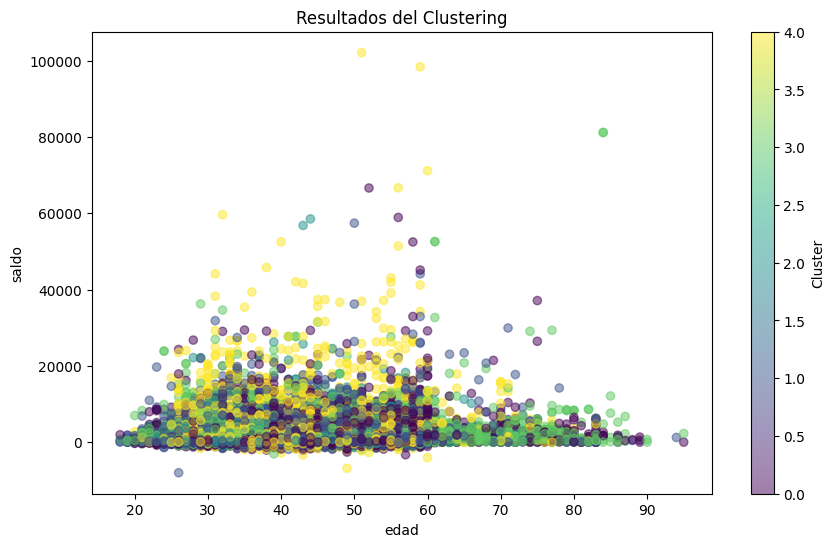

In [127]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train.drop('Cluster', axis=1))

# Visualizar los resultados del clustering en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_train['edad'], df_train['saldo'], c=df_train['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Resultados del Clustering')
plt.xlabel('edad')
plt.ylabel('saldo')
plt.colorbar(label='Cluster')
plt.show()



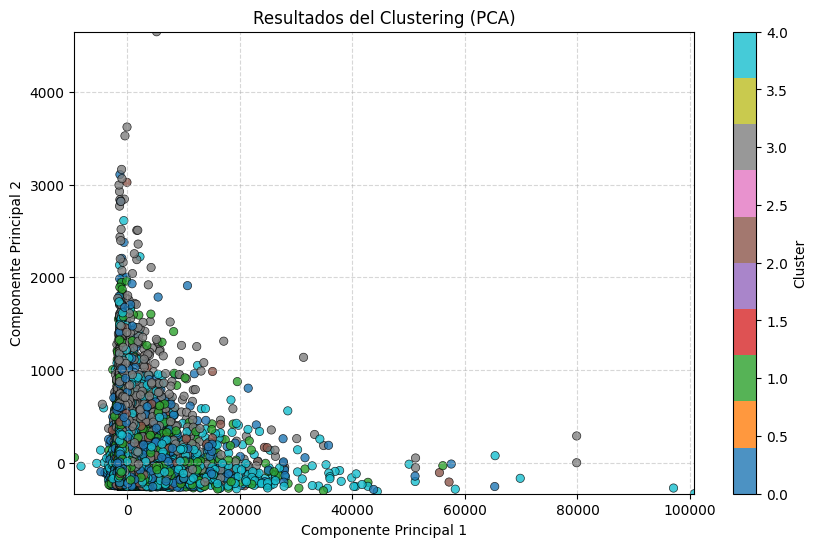

In [128]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train.drop('Cluster', axis=1))

# Visualizar los resultados del clustering en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_train['Cluster'], cmap='tab10', alpha=0.8, edgecolor='k', linewidth=0.5)
plt.title('Resultados del Clustering (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.xlim(df_pca[:, 0].min() - 0.1, df_pca[:, 0].max() + 0.1)  # Ajustar límites de eje x
plt.ylim(df_pca[:, 1].min() - 0.1, df_pca[:, 1].max() + 0.1)  # Ajustar límites de eje y
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar cuadrícula de fondo
plt.show()


In [129]:
import pandas as pd
import seaborn as sns

# Calcular estadísticas descriptivas para cada grupo
cluster_stats = df.groupby('Cluster').describe()

# Visualizar las distribuciones de características en cada grupo
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

# Imprimir estadísticas descriptivas
print(cluster_stats)


KeyError: 'Cluster'

In [ ]:
# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Dividir el DataFrame en subconjuntos para cada grupo de cluster
grupos = {}
for grupo, datos_grupo in df.groupby('Cluster'):
    grupos[grupo] = datos_grupo.copy()  # Copia los datos para evitar modificar el DataFrame original

# Visualizar los primeros registros de cada grupo
for grupo, datos_grupo in grupos.items():
    print(f"Grupo {grupo}:")
    print(datos_grupo.head())
    print("\n")


Grupo 0:
    ID  edad        trabajo estado_civil              educacion deuda  saldo  \
1    2    47       services      soltero  secundaria/superiores    no   3644   
4    5    56     management       casado         universitarios    no    217   
18  19    46    blue-collar       casado  secundaria/superiores    no      0   
20  21    49  self-employed   divorciado  secundaria/superiores    no   -478   
27  28    47    blue-collar       casado               primaria    no    699   

   vivienda prestamo    tipo_contacto  duracion fecha_contacto  campaign  \
1        no       no  Sin Información        83     9-jun-2021         2   
4        no       si            movil       121    21-jul-2021         2   
18       si       no  Sin Información       172    23-may-2021         3   
20       si       si            movil       291    20-nov-2021         1   
27       no       no            movil       203     5-aug-2021         1   

    tiempo_transcurrido  contactos_anteriores resulta

In [ ]:
from sklearn.decomposition import PCA

# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Aplicar PCA para reducir la dimensionalidad de los datos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['Clusters']))  # Excluye la columna del clúster

# Visualizar los datos en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for grupo, datos_grupo in grupos.items():
    indices_grupo = datos_grupo.index
    plt.scatter(X_pca[indices_grupo, 0], X_pca[indices_grupo, 1], label=f"Grupo {grupo}", alpha=0.5)
plt.title('Visualización de Grupos del Clúster (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

KeyError: "['Clusters'] not found in axis"